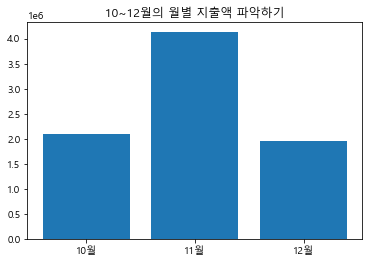

In [5]:
#하위목표 1
import csv
import matplotlib.pyplot as plt    #matplotlib.pyplot를 plt라고 하겠다.
f=open('card.csv',encoding='utf8')
data=csv.reader(f)
next(data)
data=list(data)
day=['10월','11월','12월']
s_mon=[0,0,0]
for row in data:
    if row[-1]=='전표매입':
        mon,payment=int(row[0].split('-')[1]),int(row[-3])
        idx=mon-10
        s_mon[idx]+=payment

plt.rc('font',family='Malgun Gothic') #글꼴
plt.title('10~12월의 월별 지출액 파악하기') #제목
plt.bar(day,s_mon)
plt.show()

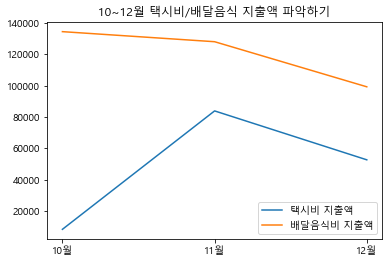

In [12]:
#하위목표 2
import matplotlib.pyplot as plt    #matplotlib.pyplot를 plt라고 하겠다.
taxi=[0,0,0]
deli=[0,0,0]
day=['10월','11월','12월']
for row in data:
    if row[-1]=='전표매입'and '택시' in row[5]:
        mon1,payment1=int(row[0].split('-')[1]),int(row[-3])
        idx1=mon1-10
        taxi[idx1]+=payment1
    elif row[-1]=='전표매입'and row[5]=='(주)우아한형제들':
        mon2,payment2=int(row[0].split('-')[1]),int(row[-3])
        idx2=mon2-10
        deli[idx2]+=payment2

plt.rc('font',family='Malgun Gothic') #글꼴
plt.title('10~12월 택시비/배달음식 지출액 파악하기') #제목
plt.plot(['10월','11월','12월'],taxi,label='택시비 지출액')
plt.plot(['10월','11월','12월'],deli,label='배달음식비 지출액')
plt.legend()
plt.show()

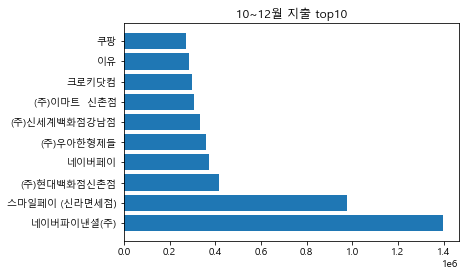

In [18]:
#하위목표 3
import operator
spending={}
for row in data:
    if row[-1]=='전표매입':
        store,payment=row[-4],int(row[-3])
        if store not in spending.keys():
            spending[store]=payment
        else:
            spending[store]+=payment
top10=sorted(spending.items(),key=operator.itemgetter(1),reverse=True)[:10]

top10_store,top10_amount=[],[]
for t in top10:
    top10_store.append(t[0])
    top10_amount.append(t[1])
    
plt.rc('font',family='Malgun Gothic') #글꼴
plt.title('10~12월 지출 top10') #제목
plt.barh(top10_store,top10_amount)      #.barh그래프는 y축이 기준임.
plt.show()